### scikit-learnで一般化線形モデル（GLM）

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor

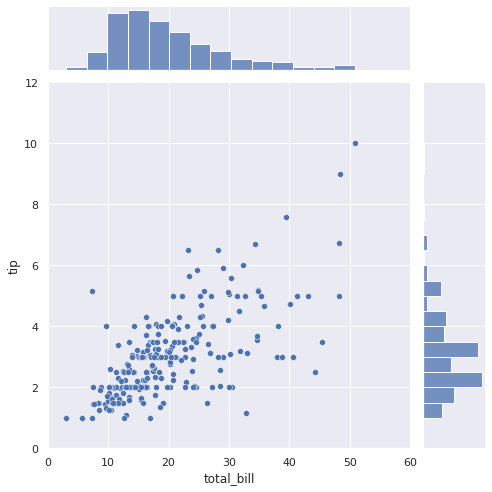

In [3]:
# チップのデータセット
df = sns.load_dataset("tips")

# 会計総額とチップのデータを可視化
sns.set(style="darkgrid")
sns.jointplot(
    x="total_bill",
    y="tip",
    data=df,
    kind="scatter",
    xlim=(0, 60),
    ylim=(0, 12),
    color="b",
    height=7,
)

In [4]:
# dfからnumpy.ndarrayに変換
y = df["tip"].values
X = df["total_bill"].values

# [x0, x1, x2,..] から [[x0], [x1], [x2]] に変換
X = X.reshape(len(X), 1)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# glm = PoissonRegressor()  # デフォルト
glm = PoissonRegressor(
    alpha=0,  # ペナルティ項
    fit_intercept=False,  # 切片
    max_iter=300,  # ソルバーの試行回数
)
glm.fit(X_train, y_train)
print("score:", glm.score(X_test, y_test))

score: 0.10779632623751223


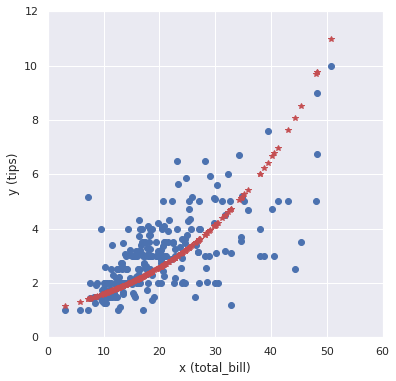

In [6]:
y_hat = glm.predict(X)

# 可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(X, y, "o")
plt.plot(X, y_hat, "*", color="r")
plt.xlabel("x (total_bill)"), plt.ylabel("y (tips)")
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()

### ポアソン回帰モデル

In [7]:
reg = TweedieRegressor(
    alpha=0,  # ペナルティ項
    power=1,  # Poisson distribution
    link="log",  # link function
    fit_intercept=False,  # 切片
    max_iter=300,  # ソルバーの試行回数
)

reg.fit(X_train, y_train)
print("score:", reg.score(X_test, y_test))

score: 0.10779632623751223


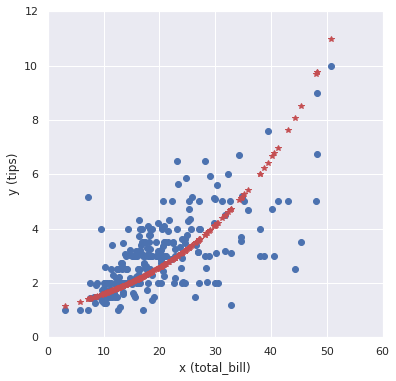

In [8]:
y_hat = reg.predict(X)

# 可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(X, y, "o")
plt.plot(X, y_hat, "*", color="r")
plt.xlabel("x (total_bill)"), plt.ylabel("y (tips)")
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()

### 線形回帰モデル

In [9]:
reg = TweedieRegressor(
    alpha=0,  # ペナルティ項
    power=0,  # Normal distribution
    link="identity",  # link function
    fit_intercept=False,  # 切片
    max_iter=300,  # ソルバーの試行回数
)

reg.fit(X_train, y_train)
print("score:", reg.score(X_test, y_test))

score: 0.24466473967927438


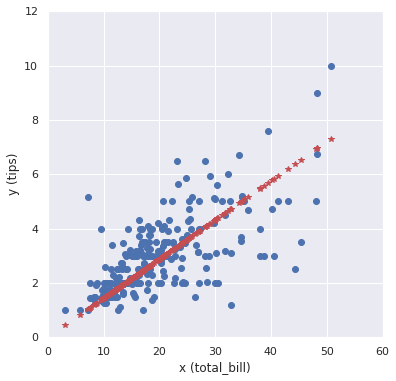

In [10]:
y_hat = reg.predict(X)

# 可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(X, y, "o")
plt.plot(X, y_hat, "*", color="r")
plt.xlabel("x (total_bill)"), plt.ylabel("y (tips)")
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()